In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys
sys.path.append("..")

In [5]:
from rom_tools.rom_manager import RomManager
from world_rando.parse_rules import parse_rules, make_level_from_room
from world_rando.coord import Coord

In [6]:
manager = RomManager("../../roms/sm_clean.smc", "../../roms/sm_junk.smc")
obj_names = manager.parse() # slow
header = obj_names["room_header_0x79e9f"]
level = make_level_from_room(header)

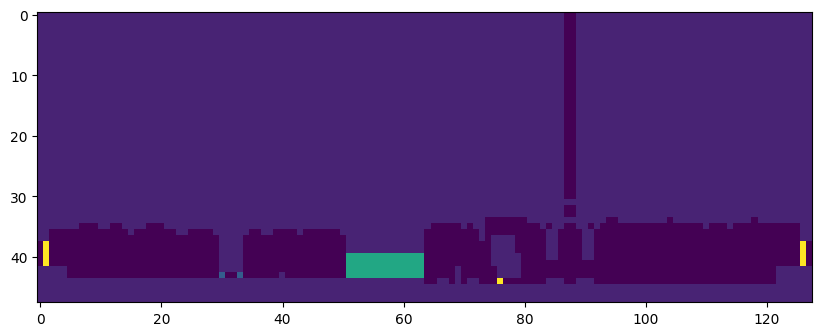

In [7]:
figure(figsize=(10,10));
imshow(level.level.T);

In [8]:
from bdds.bdd_core import *

In [9]:
context = mk_context()

In [10]:
context.bdd.vars

{'B_goal_0',
 'B_next_0',
 'B_prev_0',
 'B_temp_0',
 'Bomb_Torizo_goal_0',
 'Bomb_Torizo_next_0',
 'Bomb_Torizo_prev_0',
 'Bomb_Torizo_temp_0',
 'Botwoon_goal_0',
 'Botwoon_next_0',
 'Botwoon_prev_0',
 'Botwoon_temp_0',
 'CB_goal_0',
 'CB_next_0',
 'CB_prev_0',
 'CB_temp_0',
 'Ceres_Ridley_goal_0',
 'Ceres_Ridley_next_0',
 'Ceres_Ridley_prev_0',
 'Ceres_Ridley_temp_0',
 'Crocomire_goal_0',
 'Crocomire_next_0',
 'Crocomire_prev_0',
 'Crocomire_temp_0',
 'Drain_goal_0',
 'Drain_next_0',
 'Drain_prev_0',
 'Drain_temp_0',
 'Draygon_goal_0',
 'Draygon_next_0',
 'Draygon_prev_0',
 'Draygon_temp_0',
 'E_goal_0',
 'E_next_0',
 'E_prev_0',
 'E_temp_0',
 'GS_goal_0',
 'GS_next_0',
 'GS_prev_0',
 'GS_temp_0',
 'G_goal_0',
 'G_next_0',
 'G_prev_0',
 'G_temp_0',
 'Golden_Torizo_goal_0',
 'Golden_Torizo_next_0',
 'Golden_Torizo_prev_0',
 'Golden_Torizo_temp_0',
 'HJ_goal_0',
 'HJ_next_0',
 'HJ_prev_0',
 'HJ_temp_0',
 'IB_goal_0',
 'IB_next_0',
 'IB_prev_0',
 'IB_temp_0',
 'Kraid_goal_0',
 'Kraid_nex

In [15]:
(len(context.bdd.vars)-7) / 4

85.0

In [13]:
len([v for v in context.bdd.vars if "prev" in v])

85

In [9]:
#mk_trans(obj_names["room_header_0x79e9f"])

In [10]:
from functools import reduce

In [11]:
def build_big_policy(compute_rooms):
    print("Building local transes...")
    transes = [mk_trans(r) for r in compute_rooms]
    norule_transes = [context.exist(["rule"], trans) for trans in transes]
    print("Building local policies...")
    policies = [mk_policy(nrt) for nrt in norule_transes]
    # Should be the same as transitive closure
    room_summary_transes = [context.let(goal_to_next, context.exist(nexts, p)) for p in policies]
    print("Parsing door trans")
    door_trans = mk_door_trans("../output/tla/doors.tla")
    door_trans2 = mk_door_trans_for_rooms(door_trans, compute_rooms)
    # Compute global tranistion
    # Room -> Door -> Room -> Door -> ... etc.
    print("Building global policy...")
    all_trans = context.false
    for trans in room_summary_transes:
        all_trans |= trans
    all_trans |= door_trans2
    door_policy = mk_policy(all_trans)
    print("Putting it all together...")
    big_policy = context.false
    g0 = context.add_expr("granularity = 0")
    g1 = context.add_expr("granularity = 1")
    high_level = g0 & door_policy
    low_level = reduce(lambda x,y: x | y, [g1 & p for p in policies], context.false)
    return high_level | low_level

In [12]:
morph_room = obj_names["room_header_0x79e9f"]
construction_zone = obj_names["room_header_0x79e9f"].door_list.l[1].to_room
missiles_room = construction_zone.door_list.l[2].to_room

In [13]:
morph_room, construction_zone, missiles_room

(room_header_0x79e9f, room_header_0x79f11, room_header_0x7a107)

In [14]:
compute_rooms = [morph_room, construction_zone, missiles_room]

In [15]:
print("Building local transes...")
transes = [mk_trans(r, context) for r in compute_rooms]
norule_transes = [context.exist(["rule"], trans) for trans in transes]

Building local transes...


 32%|█████████████████████████▏                                                     | 1959/6144 [00:21<00:44, 93.14it/s]


KeyboardInterrupt: 

In [42]:
%%time
print("Building local policies...")
policies = [mk_policy(nrt, context) for nrt in norule_transes]

Building local policies...
0 47003 25666 47003
1 51229 35280 78577
2 58918 43148 96659
3 66992 48801 112704
4 73600 53556 126246
5 79810 57272 138327
6 84141 60238 149753
7 87218 62869 158967
8 91013 65200 167159
9 93475 67367 175380
10 92075 69230 181330
11 91601 70609 184714
12 89810 71731 187247
13 88076 72418 188440
14 86066 72766 188603
15 84764 73091 189037
16 83762 72998 189173
17 82394 72617 189129
18 80870 72081 188573
19 79154 71537 187897
20 77144 71023 187150
21 75530 70659 186421
22 74029 70444 185833
23 72687 70336 185271
24 71547 70266 184560
25 70507 70155 183641
26 69678 70072 182667
27 69099 70082 182100
28 68814 70081 181642
29 68878 70047 181236
30 68776 70058 181117
31 68601 70043 181240
32 68271 70052 181199
33 67849 70057 180948
34 67352 70112 180695
35 66702 70158 180504
36 66099 70181 180219
37 65327 70206 180310
38 64644 70237 180525
39 64127 70278 181045
40 63958 70288 181783
41 63779 70404 182432
42 63696 70615 183014
43 63515 70812 183590
44 63242 70989 184

In [40]:
print("Parsing door trans")
door_trans = mk_door_trans("../output/tla/doors.tla", context)
door_trans2 = mk_door_trans_for_rooms(door_trans, compute_rooms, context)

Parsing door trans


In [19]:
room_summary_transes = [context.let(goal_to_next, context.exist(nexts, p)) for p in policies]
print("Building global policy...")
all_trans = context.false
for trans in room_summary_transes:
    all_trans |= trans
    print("transing")
all_trans |= door_trans2
print("transing2")

Building global policy...
transing
transing
transing
transing2


In [23]:
all_trans.dag_size

57356

In [76]:
int(all_trans.count())
# 1,034,821,527,591,458,963,456

1034821527591458963456

In [79]:
all_trans.count()

1.034821527591459e+21

In [81]:
context.support(all_trans)

{'B_next',
 'B_prev',
 'Bomb_Torizo_next',
 'Bomb_Torizo_prev',
 'Botwoon_next',
 'Botwoon_prev',
 'CB_next',
 'CB_prev',
 'Ceres_Ridley_next',
 'Ceres_Ridley_prev',
 'Crocomire_next',
 'Crocomire_prev',
 'Drain_next',
 'Drain_prev',
 'Draygon_next',
 'Draygon_prev',
 'E_next',
 'E_prev',
 'GS_next',
 'GS_prev',
 'G_next',
 'G_prev',
 'Golden_Torizo_next',
 'Golden_Torizo_prev',
 'HJ_next',
 'HJ_prev',
 'IB_next',
 'IB_prev',
 'Kraid_next',
 'Kraid_prev',
 'MB_next',
 'MB_prev',
 'M_next',
 'M_prev',
 'Mother_Brain_next',
 'Mother_Brain_prev',
 'PB_next',
 'PB_prev',
 'PLB_next',
 'PLB_prev',
 'Phantoon_next',
 'Phantoon_prev',
 'RT_next',
 'RT_prev',
 'Ridley_next',
 'Ridley_prev',
 'SA_next',
 'SA_prev',
 'SB_next',
 'SB_prev',
 'SJ_next',
 'SJ_prev',
 'SPB_next',
 'SPB_prev',
 'START_next',
 'START_prev',
 'S_next',
 'S_prev',
 'Shaktool_next',
 'Shaktool_prev',
 'Spazer_next',
 'Spazer_prev',
 'Spore_Spawn_next',
 'Spore_Spawn_prev',
 'Statues_next',
 'Statues_prev',
 'V_next',
 'V

In [78]:
context.exist(nexts, all_trans).count() * context.exist(prevs, all_trans).count()

15872518921680.0

In [71]:
import sys

In [75]:
context.bdd.dump("../output/all_trans.json", [all_trans])

In [66]:
4193880.0 ** 2

17588629454400.0

In [35]:
%%time
door_policy = mk_policy(all_trans, context)

0 162006 64297 162006
1 9839 69386 171791
2 31137 85370 203258
3 30871 94630 244301
4 30771 99813 261553
5 18804 100439 269522
6 24621 99381 280727
7 12790 98558 285284
8 16914 96652 285097
9 8552 95451 283960
10 9250 93608 283079
11 5336 92277 281949
12 1020 92130 281721
13 1 92130 281721
CPU times: user 1.64 s, sys: 38 µs, total: 1.64 s
Wall time: 1.64 s


In [43]:
print("Putting it all together...")
big_policy = context.false
g0 = context.add_expr("granularity = 0")
g1 = context.add_expr("granularity = 1")
high_level = g0 & door_policy
low_level = reduce(lambda x,y: x | y, [g1 & p for p in policies], context.false)
big_policy = high_level | low_level

Putting it all together...
CPU times: user 669 µs, sys: 3 µs, total: 672 µs
Wall time: 627 µs


In [ ]:
#big_policy = build_big_policy(compute_rooms)

In [27]:
big_policy.dag_size

488619

In [86]:
context.exist(nexts + goals, big_policy).count()

4718512.0

In [95]:
a = context.exist(nexts + goals, big_policy)

In [96]:
context.support(a)

{'B_prev',
 'MB_prev',
 'M_prev',
 'PB_prev',
 'granularity',
 'pose_prev',
 'room_id_prev',
 'vh_prev',
 'vt_prev',
 'vv_prev',
 'x_prev',
 'y_prev'}

In [103]:
aa = 2 ** len(set(prevs) - context.support(a))

In [136]:
context.count(a) * aa
# 20,265,854,725,783,552
# 16,749,942,957,670,400

20265854725783552

In [105]:
b = context.exist(nexts + prevs, big_policy)

In [138]:
len(set(goals) - context.support(b))

32

In [106]:
bb = 2 ** len(set(goals) - context.support(b))

In [107]:
context.count(b) * bb

16749942957670400

In [137]:
float(339451910645309602137008557260800)

3.394519106453096e+32

In [139]:
context.count(a) * context.count(b)

18401724948800

In [131]:
context.count(a) * aa * context.count(b) * bb

339451910645309602137008557260800

In [117]:
aa, bb

(4294967296, 4294967296)

In [111]:
c = context.exist(nexts, big_policy)

In [113]:
cc = 2 ** len(set(goals + prevs) - context.support(c))

In [ ]:
# 6,012,462,171,247,079,325,696

In [141]:
158145916181457869673070592 / 6012462171247079325696

26303.020572461402

In [143]:
context.support(context.exist(prevs + nexts + goals, big_policy))

set()

In [114]:
context.count(c) * cc

6012462171247079325696

In [134]:
6012462171247079325696 / 339451910645309602137008557260800

1.7712264926767343e-11

In [91]:
context.bdd.dump("../output/big_policy.json", [big_policy])

In [78]:
(low_level & context.add_expr("room_id_prev = 40721") & g1).count()

3.286541444851958e+17

In [79]:
(low_level & context.add_expr("room_id_prev = 41223") & g1).count()

3.285753919648563e+16

In [82]:
(low_level & context.add_expr("room_id_prev != room_id_next") & g1).count()

0.0

In [ ]:
## Find a path

In [46]:
#TODO: given a task condition, resolve goal conditions to good goals...
# BFS from prev -> next until nexts & goal is true, then nexts & goal is the optimal set of goals
task_expr = context.add_expr("M_prev < M_goal & room_id_prev = 40721 & room_id_goal = 40721 & x_prev = 12")
# Concrete task
task = context.exist(nexts + ["granularity"], big_policy & task_expr).pick()
task_bdd = context.bdd.cube(task)

In [55]:
%%time
task_bdd & big_policy

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 10.3 µs


Function (DdNode) with var index: 0, ref count: 3, int repr: 464543555

In [47]:
# resolve_goal(current_state, underspecified_goal):
# output is dict from each state parameter to the value
#  which can be passed to get_policy_advice

# Distance Oracle - prevs -> goals -> dist

## Construct a high-level and low-level path simultaneously

In [48]:
def get_policy_advice(current_state, goal_state, granularity):
    current_state_p = context.assign_from(current_state)
    goal_bdd_g = context.assign_from(goal_state)
    gn = context.add_expr(f"granularity = {granularity}")
    return context.pick(context.exist(prevs + goals + ["granularity"], current_state_p & gn & big_policy & goal_bdd_g))

In [63]:
%%time
get_policy_advice(context.pick(context.exist(goals, task_bdd)), context.pick(context.exist(prevs, task_bdd)), 0)

CPU times: user 7.65 ms, sys: 0 ns, total: 7.65 ms
Wall time: 7.56 ms


{'room_id_next': 40721,
 'x_next': 0,
 'y_next': 23,
 'pose_next': 0,
 'vt_next': 1,
 'vh_next': 0,
 'vv_next': 0,
 'B_next': 0,
 'PB_next': 0,
 'SPB_next': 0,
 'S_next': 0,
 'M_next': 0,
 'G_next': 0,
 'SA_next': 0,
 'V_next': 0,
 'GS_next': 0,
 'SB_next': 0,
 'HJ_next': 0,
 'MB_next': 1,
 'CB_next': 0,
 'WB_next': 0,
 'E_next': 0,
 'PLB_next': 0,
 'Spazer_next': 0,
 'RT_next': 0,
 'XR_next': 0,
 'IB_next': 0,
 'SJ_next': 0,
 'Kraid_next': 0,
 'Phantoon_next': 0,
 'Draygon_next': 0,
 'Ridley_next': 0,
 'Botwoon_next': 0,
 'Spore_Spawn_next': 0,
 'Golden_Torizo_next': 0,
 'Bomb_Torizo_next': 0,
 'Mother_Brain_next': 0,
 'Crocomire_next': 0,
 'Drain_next': 0,
 'Shaktool_next': 0,
 'START_next': 0,
 'Statues_next': 0}

In [51]:
# TODO: make this into a function
# TODO: make a dict-only version
# TODO: add hungarian notation to bdd_core.py
keep_vars = ["x_prev", "y_prev", "room_id_prev", "x_next", "y_next", "room_id_next", "M_prev", "M_next"]
keep_vars2 = ["x_goal", "y_goal", "room_id_goal", "M_goal"]
exist_vars = list(filter(lambda x: x not in keep_vars, context.vars.keys()))
exist_vars2 = list(filter(lambda x: x not in keep_vars2, context.vars.keys()))
current_state_p = context.exist(goals, task_bdd)
goal_bdd_g = context.exist(prevs, task_bdd)
goal_satisfied_ng = mk_goal_satisfied(context)
next_to_goal = mk_replace(context, "next", "goal")
node_posns = []
room_posns = []
while True:
    #print()
    # If you want to reason about complex goal spaces...
    #next_state_bdd_n = context.assign_from(context.pick(context.exist(prevs + goals + ["granularity"], current_state_p & g0 & big_policy & goal_bdd_g)))
    next_state_bdd_n = context.assign_from(get_policy_advice(context.pick(current_state_p), context.pick(goal_bdd_g), 0))
    # Within room
    within_room_goal_g = context.let(next_to_goal, context.exist(goals, next_state_bdd_n))
    #print(within_room_goal_g.count())
    #print(context.pick(context.exist(exist_vars2, within_room_goal_g)))
    #v = (current_state_p & g1 & big_policy & within_room_goal_g).count()
    v = get_policy_advice(context.pick(current_state_p), context.pick(within_room_goal_g), 1)
    if v:
        #print(f"room stuff: {v=}")
        #current_state_p = current_state_p
        while True:
            #next_state_bdd_n = context.assign_from(context.pick(context.exist(prevs + goals + ["granularity"], current_state_p & g1 & big_policy & within_room_goal_g)))
            next_state_bdd_n = context.assign_from(get_policy_advice(context.pick(current_state_p), context.pick(within_room_goal_g), 1))
            current_state_p = context.let(next_to_prev, next_state_bdd_n)
            current_node = context.pick(context.exist(exist_vars, current_state_p))
            node_posns.append(current_node)
            #print(current_node)
            if (goal_satisfied_ng & next_state_bdd_n & within_room_goal_g).count() > 0:
                break
    current_node = context.pick(context.exist(exist_vars, current_state_p))
    node_posns.append(current_node)
    print(current_node)
    print(context.pick(context.exist(exist_vars, next_state_bdd_n)))
    current_state_p = context.let(next_to_prev, next_state_bdd_n)
    if (goal_satisfied_ng & next_state_bdd_n & goal_bdd_g).count() > 0:
        break

{'room_id_prev': 40721, 'x_prev': 0, 'y_prev': 23, 'M_prev': 0}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 23, 'M_next': 0}
{'room_id_prev': 40721, 'x_prev': 0, 'y_prev': 23, 'M_prev': 0}
{'room_id_next': 41223, 'x_next': 15, 'y_next': 7, 'M_next': 0}
{'room_id_prev': 41223, 'x_prev': 15, 'y_prev': 7, 'M_prev': 1}
{'room_id_next': 41223, 'x_next': 15, 'y_next': 7, 'M_next': 1}
{'room_id_prev': 41223, 'x_prev': 15, 'y_prev': 7, 'M_prev': 1}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 23, 'M_next': 1}
{'room_id_prev': 40721, 'x_prev': 0, 'y_prev': 7, 'M_prev': 1}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 7, 'M_next': 1}
{'room_id_prev': 40721, 'x_prev': 0, 'y_prev': 7, 'M_prev': 1}
{'room_id_next': 40607, 'x_next': 127, 'y_next': 39, 'M_next': 1}
{'room_id_prev': 40607, 'x_prev': 127, 'y_prev': 39, 'M_prev': 1}
{'room_id_next': 40721, 'x_next': 0, 'y_next': 7, 'M_next': 1}
CPU times: user 860 ms, sys: 0 ns, total: 860 ms
Wall time: 859 ms


In [52]:
len(node_posns)

95

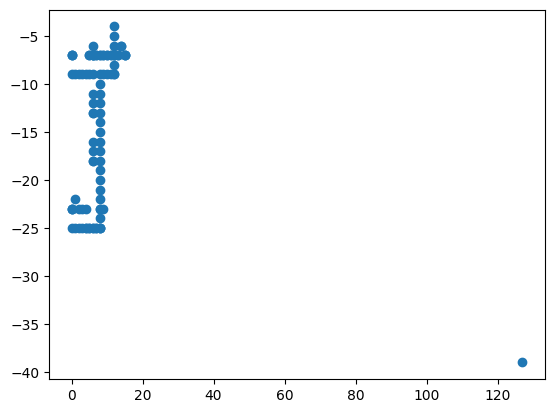

In [50]:
xs = [p["x_prev"] for p in node_posns]
ys = [-p["y_prev"] for p in node_posns]
scatter(xs, ys)

In [151]:
start = context.assign_from({'room_id_prev': 40721, 'x_prev': 12, 'y_prev': 3, 'M_prev': 0})
end = context.assign_from({'room_id_goal': 40721, 'x_goal': 0, 'y_goal': 23, 'M_goal': 0})

In [157]:
(current_state_p & within_room_goal_g & policies[0]).count()

4.0

In [171]:
(current_state_p & within_room_goal_g & context.exist(["granularity"], big_policy & g1)).count()

4.0

In [111]:
h = obj_names["room_header_0x79f11"]
level_h = make_level_from_room(h)

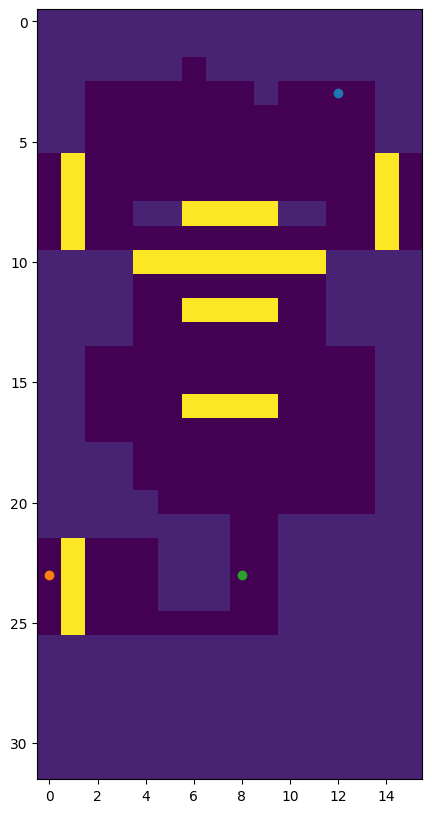

In [125]:
figure(figsize=(10,10));
scatter(12, 3)
scatter(0, 23)
scatter(8, 23)
imshow(level_h.level.T);

In [1]:
# Distance Oracle

In [32]:
context.declare(**{"dist": (0, 65535)})

In [33]:
missiles_trans_pn = mk_trans(missiles_room, context)

100%|█████████████████████████████████████████████████████████████████████████████████| 256/256 [00:14<00:00, 17.67it/s]


In [102]:
def mk_cost(trans_pn, context):
    n = 1
    # prev, next, goal
    covered_ng = mk_goal_satisfied(context)
    cost_pgd = context.let(next_to_prev, covered_ng) & context.add_expr("dist = 0")
    covered_last_ng = context.false
    while covered_ng != covered_last_ng:
        # States with edges into a covered state
        covered_last_ng = covered_ng
        covered_temp_pg = context.exist(nexts, trans_pn & covered_ng)
        covered_temp_ng = context.let(prev_to_next, covered_temp_pg)
        # policy(prev, next, goal) = trans(prev, next) & covered(next, goal) & ~covered(prev, goal)
        covered_pg = context.let(next_to_prev, covered_ng)
        cost_pgd |= context.exist(nexts, trans_pn & covered_ng & ~covered_pg) & context.add_expr(f"dist = {n}")
        # Find a state in covered that the fringe state transitions to
        covered_ng |= covered_temp_ng
        print(n, covered_temp_ng.dag_size, covered_ng.dag_size, cost_pgd.dag_size)
        n += 1
    return cost_pgd

In [103]:
cost = mk_cost(missiles_trans_pn, context)

1 1277 1989 6159
2 1900 2659 6985
3 2716 3552 7825
4 3532 4435 10071
5 4105 5058 10760
6 4542 5563 11588
7 4860 5927 11703
8 5177 6255 14350
9 5425 6521 14577
10 5669 6770 15065
11 5926 7049 14251
12 6068 7193 16670
13 6167 7297 16769
14 6256 7387 17151
15 6364 7495 15913
16 6413 7544 18376
17 6373 7504 18367
18 6180 7311 18549
19 5868 6999 17407
20 5499 6630 19027
21 5020 6151 18908
22 4548 5679 18915
23 4158 5289 18272
24 3810 4941 18920
25 3537 4668 18830
26 3271 4402 18800
27 3110 4241 18587
28 2980 4111 18743
29 2853 3984 18702
30 2796 3927 18681
31 2758 3889 18641
32 2719 3850 18692
33 2719 3850 18692


In [104]:
task_expr = context.add_expr("M_prev < M_goal & x_prev = 12 & x_goal = 12")
# Concrete task
task = context.exist(nexts + ["granularity"], cost & task_expr).pick()
task_bdd = context.exist(["dist"], context.bdd.cube(task))

In [105]:
task_bdd.count()

1.0

In [106]:
context.pick((task_bdd & cost))["dist"]
# Find the min using binary search, or iterative refinement!
#TODO: make the cost oracle also be hierarchical

15

In [107]:
def concretify_task(task_bdd, cost):
    lower = 0
    upper = context.pick(task_bdd & cost)["dist"]
    while lower < upper:
        guess = (lower + upper) // 2
        print(guess, lower, upper)
        d_expr = context.add_expr(f"dist < {guess}")
        if (task_bdd & cost & d_expr).count() > 0:
            upper = context.pick(task_bdd & cost & d_expr)["dist"]
        else:
            lower = guess + 1
    final_d = context.add_expr(f"dist = {upper}")
    return context.pick(task_bdd & cost & final_d)

In [110]:
#task_expr = context.add_expr("M_prev < M_goal & x_prev = 12")
task_expr = context.add_expr("(x_goal = 4 | x_goal = 9) & x_prev = 6")

In [111]:
concretify_task(task_expr, cost)

1 0 3
2 2 3


{'room_id_prev': 41223,
 'room_id_goal': 41223,
 'x_prev': 6,
 'x_goal': 4,
 'y_prev': 7,
 'y_goal': 4,
 'pose_prev': 0,
 'pose_goal': 2,
 'vt_prev': 1,
 'vt_goal': 1,
 'vh_prev': 0,
 'vh_goal': 0,
 'vv_prev': 0,
 'vv_goal': 1,
 'B_prev': 0,
 'B_goal': 0,
 'PB_prev': 0,
 'PB_goal': 0,
 'SPB_prev': 0,
 'SPB_goal': 0,
 'S_prev': 0,
 'S_goal': 0,
 'M_prev': 0,
 'M_goal': 0,
 'G_prev': 0,
 'G_goal': 0,
 'SA_prev': 0,
 'SA_goal': 0,
 'V_prev': 0,
 'V_goal': 0,
 'GS_prev': 0,
 'GS_goal': 0,
 'SB_prev': 0,
 'SB_goal': 0,
 'HJ_prev': 0,
 'HJ_goal': 0,
 'MB_prev': 0,
 'MB_goal': 0,
 'CB_prev': 0,
 'CB_goal': 0,
 'WB_prev': 0,
 'WB_goal': 0,
 'E_prev': 0,
 'E_goal': 0,
 'PLB_prev': 0,
 'PLB_goal': 0,
 'Spazer_prev': 0,
 'Spazer_goal': 0,
 'RT_prev': 0,
 'RT_goal': 0,
 'XR_prev': 0,
 'XR_goal': 0,
 'IB_prev': 0,
 'IB_goal': 0,
 'SJ_prev': 0,
 'SJ_goal': 0,
 'Kraid_prev': 0,
 'Kraid_goal': 0,
 'Phantoon_prev': 0,
 'Phantoon_goal': 0,
 'Draygon_prev': 0,
 'Draygon_goal': 0,
 'Ridley_prev': 0,
 'Rid

In [ ]:
def build_distance_oracle(compute_rooms):
    print("Building local transes...")
    transes = [mk_trans(r) for r in compute_rooms]
    norule_transes = [context.exist(["rule"], trans) for trans in transes]
    print("Building local policies...")
    policies = [mk_policy(nrt) for nrt in norule_transes]
    # Should be the same as transitive closure
    room_summary_transes = [context.let(goal_to_next, context.exist(nexts, p)) for p in policies]
    print("Parsing door trans")
    door_trans = mk_door_trans("../output/tla/doors.tla")
    door_trans2 = mk_door_trans_for_rooms(door_trans, compute_rooms)
    # Compute global tranistion
    # Room -> Door -> Room -> Door -> ... etc.
    print("Building global policy...")
    all_trans = context.false
    for trans in room_summary_transes:
        all_trans |= trans
    all_trans |= door_trans2
    door_policy = mk_policy(all_trans)
    print("Putting it all together...")
    big_policy = context.false
    g0 = context.add_expr("granularity = 0")
    g1 = context.add_expr("granularity = 1")
    high_level = g0 & door_policy
    low_level = reduce(lambda x,y: x | y, [g1 & p for p in policies], context.false)
    return high_level | low_level